Task - Prediction using Supervised ML
By Ananya Chaurasia


Task explaination :
Predict the percentage of an student based on the no. of study hours.
● This is a simple linear regression task as it involves just 2 variables.
● You can use R, Python, SAS Enterprise Miner or any other tool
● Data can be found at http://bit.ly/w-data
● What will be predicted score if a student studies for 9.25 hrs/ day?


In [3]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
%matplotlib inline

# Reading data from remote link
data = pd.read_csv("http://bit.ly/w-data")
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.isnull == True

False

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


To get full summary of data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


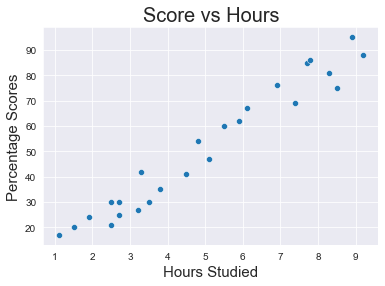

In [7]:
# Plotting the distribution of scores in 2d graph as scatter plot

sns.set_style('darkgrid')
sns.scatterplot(y = data['Scores'], x = data['Hours'])
plt.title('Score vs Hours', size = 20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Scores', size=15)
plt.show()

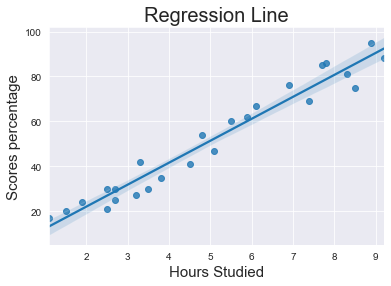

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
#regression line 
sns.regplot(x = data['Hours'], y = data['Scores'])
plt.title('Regression Line', size = 20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Scores percentage', size=15)
plt.show()
print(data.corr())


In [19]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [24]:
from sklearn.model_selection import train_test_split  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
regression = LinearRegression()
regression.fit(train_X, train_y)

print("Training Complete.")

Training Complete.


In [26]:
pred_y = regression.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [27]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': test_y, 'Predicted' : pred_y})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


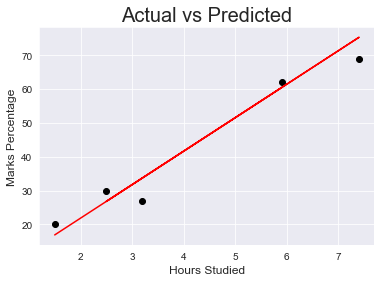

In [28]:
plt.scatter(x=test_X, y=test_y, color='Black')
plt.plot(test_X, pred_y, color='Red')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


Predicting the score if studied for 9.25 hours/day

In [29]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


According to linear regression model, predicted score if a student studies for 9.25 hrs/ day is 93.893

In [30]:
#mean absolute error to evaluate performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y))

Mean Absolute Error: 4.183859899002975
